In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import cv2 as cv
import os
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pickle

In [2]:
#Fixed variables which will be used later
BATCH_SIZE = 16
IMAGE_SIZE = [256, 256]

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory("C:\Python Workspace\Project X\My Eyes",
                                                               validation_split = 0.2,
                                                               subset = "training",
                                                               seed = 1337,
                                                               image_size = IMAGE_SIZE,
                                                               batch_size = BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory("C:\Python Workspace\Project X\My Eyes",
                                                             validation_split = 0.2,
                                                             subset = "validation",
                                                             seed = 1337,
                                                             image_size = IMAGE_SIZE,
                                                             batch_size = BATCH_SIZE)

Found 178 files belonging to 2 classes.
Using 143 files for training.
Found 178 files belonging to 2 classes.
Using 35 files for validation.


In [4]:
class_names = ['constricted new-20240412T125353Z-001', 'normal new-20240412T125443Z-001']
train_ds.class_names = class_names
val_ds.class_names = class_names

NUM_CLASSES = len(class_names)

In [5]:
NUM_IMAGES = []

for label in class_names:
    # Construct the directory path using the label
    dir_name = os.path.join("C:\\Python Workspace\\Project X\\My Eyes", label)
    
    # Check if the directory exists
    if os.path.exists(dir_name):
        num_files = len(os.listdir(dir_name))
        NUM_IMAGES.append(num_files)
    else:
        print(f"Directory not found: {dir_name}")

# Check the NUM_IMAGES list to see the counts
print(NUM_IMAGES)

[98, 1]


In [6]:
# Extract features from the images
X_train = []
y_train = []
for images, labels in train_ds:
    features = images.numpy().reshape(images.shape[0], -1)  # Flatten images
    X_train.append(features)
    y_train.extend(labels.numpy())

X_train = np.concatenate(X_train, axis = 0)
y_train = np.array(y_train)

In [7]:
# Train Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [8]:
# Evaluate the classifier on the validation set
X_val = []
y_val = []
for images, labels in val_ds:
    features = images.numpy().reshape(images.shape[0], -1)  # Flatten images
    X_val.append(features)
    y_val.extend(labels.numpy())

X_val = np.concatenate(X_val, axis = 0)
y_val = np.array(y_val)

In [9]:
nb_pred = nb_classifier.predict(X_val)
accuracy = np.mean(nb_pred == y_val)
print("Naive Bayes Accuracy:", accuracy)

Naive Bayes Accuracy: 0.6571428571428571


Here I have flatten the images. It is a process of converting a 2 dimensional image(in this case a grayscale) into a one dimensional array. In the context of image data, each pixel in the image is considered a feature, and by flattening the image, we're essentially converting the two-dimensional arrangement of pixels into a one-dimensional sequence of pixel values.

Here on we'll be using the Naive Bayes classifier

Here I'll be applying the Logistic Regression

In [10]:
# Build the logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),  # Flatten the input images
    tf.keras.layers.Dense(1, activation = 'sigmoid')  # Output layer with sigmoid activation for binary classification
])

In [11]:
# Compile the model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Train the model
model.fit(train_ds, validation_data = val_ds, epochs = 9)

# Evaluate the model
accuracy1 = model.evaluate(val_ds)[1]
print("Logistic Regression Accuracy:", accuracy1)

Epoch 1/9
9/9 [==============================] - 1s 21ms/step - loss: 2637.5337 - accuracy: 0.5594 - val_loss: 283.0059 - val_accuracy: 0.7714
Epoch 2/9
9/9 [==============================] - 0s 10ms/step - loss: 665.8597 - accuracy: 0.6993 - val_loss: 1729.1842 - val_accuracy: 0.5143
Epoch 3/9
9/9 [==============================] - 0s 10ms/step - loss: 719.2325 - accuracy: 0.7413 - val_loss: 1056.8995 - val_accuracy: 0.6286
Epoch 4/9
9/9 [==============================] - 0s 16ms/step - loss: 984.2385 - accuracy: 0.6713 - val_loss: 2861.0388 - val_accuracy: 0.4857
Epoch 5/9
9/9 [==============================] - 0s 11ms/step - loss: 922.2449 - accuracy: 0.7203 - val_loss: 759.9915 - val_accuracy: 0.7714
Epoch 6/9
9/9 [==============================] - 0s 12ms/step - loss: 394.5373 - accuracy: 0.8601 - val_loss: 514.6517 - val_accuracy: 0.8000
Epoch 7/9
9/9 [==============================] - 0s 12ms/step - loss: 265.2270 - accuracy: 0.8671 - val_loss: 633.5756 - val_accuracy: 0.8000
Ep

Below, I have used Decision Tree

In [12]:
# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
#Printing accuracy for DT
dt_pred = dt_classifier.predict(X_val)
accuracy2 = np.mean(dt_pred == y_val)
print("Decision Tree Accuracy:", accuracy2)

Decision Tree Accuracy: 0.5142857142857142


Now we'll use Random Forest Classifier

In [14]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
#printing accuracy for RFC
rf_pred = rf_classifier.predict(X_val)
accuracy3 = np.mean(rf_pred == y_val)
print("Random Forest Accuracy:", accuracy3)

Random Forest Accuracy: 0.7428571428571429


We will now apply SVM(Support Vector Machine)

In [16]:
# Train an SVM Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [17]:
#Printing accuracy for SVM
svm_pred = svm_classifier.predict(X_val)
accuracy4 = np.mean(svm_pred == y_val)
print("SVM Accuracy:", accuracy4)

SVM Accuracy: 0.8


In [18]:
with open(r"svm_model.pkl","rb") as f:
    model1 = pickle.load(f)

In [19]:
image  = cv.imread(r"C:\Python Workspace\Project X\My Eyes\normal new-20240412T125443Z-001\normal new\photo-1564278692313-b2d65996fc93 copy.jpg")
print(type(image))
image = image.flatten().reshape(1, -1)
pred = model1.predict(image)
print(pred)

<class 'numpy.ndarray'>
[1]


Lastly we will use KNN classifier to measure accuracy

In [20]:
# Train a k-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
#Printing accuracy for KNN
knn_pred = knn_classifier.predict(X_val)
accuracy5 = np.mean(knn_pred == y_val)
print("KNN Accuracy:", accuracy5)

KNN Accuracy: 0.7142857142857143


Classification Report given below will give you gist of all performance of models by listing their respective accuracies

In [22]:
# Train and evaluate classifiers
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [23]:
myreport = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    accuracy = np.mean(y_pred == y_val)
    myreport[name] = accuracy
    
# Print accuracies
for name, accuracy in myreport.items():
    print(f"{name} Accuracy: {accuracy}")
    
# Create and print classification report
print("\nClassification Report:")
for name, classifier in classifiers.items():
    y_pred = classifier.predict(X_val)
    report = classification_report(y_val, y_pred)
    print(f"{name}:\n{report}\n")

c:\Users\post2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes Accuracy: 0.6571428571428571
Logistic Regression Accuracy: 0.8285714285714286
Decision Tree Accuracy: 0.6571428571428571
Random Forest Accuracy: 0.8
SVM Accuracy: 0.8
KNN Accuracy: 0.6857142857142857

Classification Report:
Naive Bayes:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        19
           1       0.61      0.69      0.65        16

    accuracy                           0.66        35
   macro avg       0.66      0.66      0.66        35
weighted avg       0.66      0.66      0.66        35


Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.78      0.88      0.82        16

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35


Decision Tree:
              precision    recall  f1-score   support

    

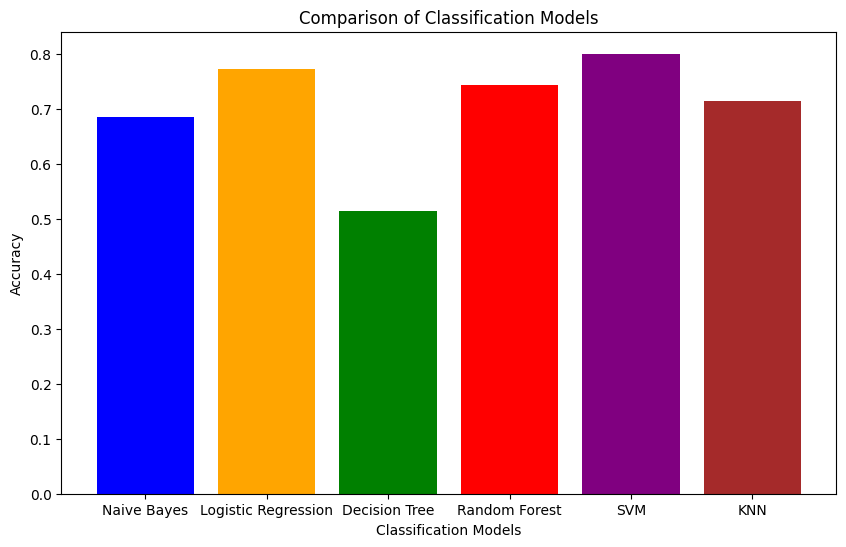

In [24]:
#Graphical representation Bar Plot
import matplotlib.pyplot as plt

# Accuracy scores for each model
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
accuracies = [accuracy, accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

# Adding labels and title
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Models')

# Show plot
plt.show()


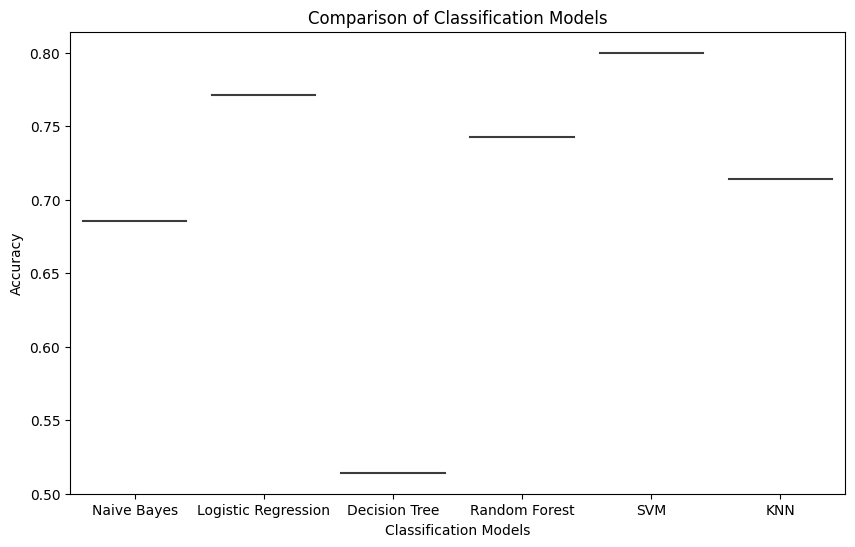

In [25]:
#Violin plot
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy scores for each model
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
accuracies = [accuracy, accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]

# Creating the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=models, y=accuracies, palette="muted")

# Adding labels and title
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Models')

# Show plot
plt.show()

C:\Users\post2\AppData\Local\Temp\ipykernel_29976\2287462859.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=models, y=accuracies, palette="Set2", dodge=True, size=8)


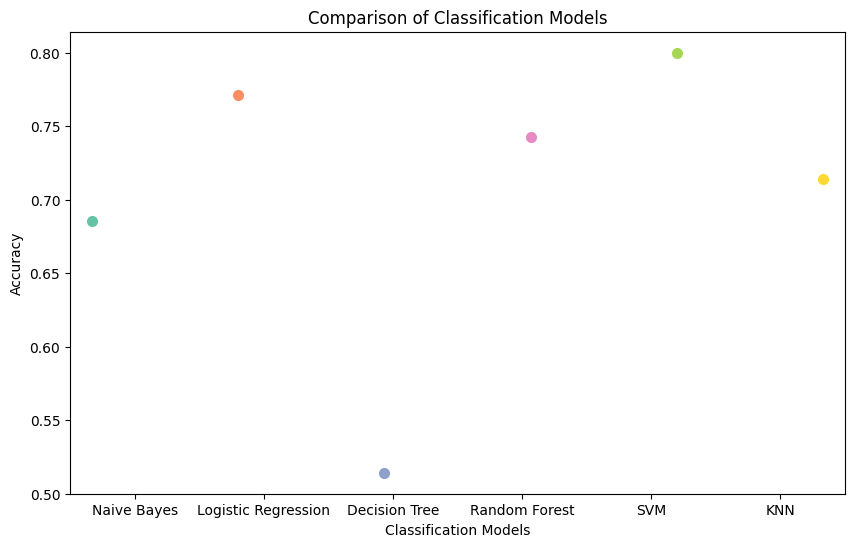

In [26]:
#Swarm plot
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy scores for each model
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
accuracies = [accuracy, accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]

# Creating the swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x=models, y=accuracies, palette="Set2", dodge=True, size=8)

# Adding labels and title
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Models')

# Show plot
plt.show()

1/1 [==============================] - 0s 17ms/step


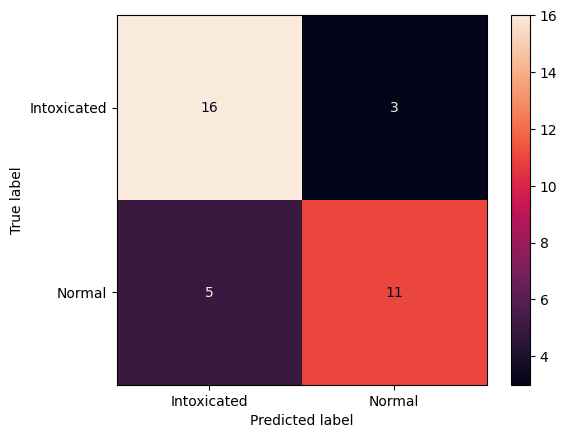

In [43]:
#Confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize empty lists to store true labels and predicted labels
y_true = []
y_pred = []

# Iterate over the validation dataset to get true labels and predictions
for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Append true labels
    y_pred.extend(model.predict(images) > 0.5)  # Append predicted labels

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Intoxicated", "Normal"])
disp.plot(cmap = "rocket")
plt.show()

In [28]:
# # Save Logistic Regression model to a file
# with open("logistic_regression_model.pkl", "wb") as f:
#     pickle.dump(model, f)

# # Save SVM model to a file
# with open("svm_model.pkl", "wb") as f:
#     pickle.dump(svm_classifier, f)

In [29]:
# # Save RFC model to a file
# with open("rfc_model.pkl", "wb") as f:
#     pickle.dump(rf_classifier, f)